In [2]:
import pennylane as qml
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
get_device = lambda n: qml.device("default.qubit", wires=2*n+2, shots=8192)

In [4]:
def create_qgb_circuit(n):
    """Creates a quantum circuit for the Quantum Galton Board (QGB) with n levels."""

    dev = get_device(n)
    if n == 1:
        # For n=1, we can return a simple circuit
        
        @qml.qnode(dev)
        def qgb_one_level_circuit():
            qml.Hadamard(wires=0)
            qml.X(wires=2)
            qml.CSWAP(wires=[0, 1, 2])
            qml.CNOT(wires=[2, 0])
            qml.CSWAP(wires=[0, 2, 3])
            return qml.probs(wires=[1, 3])
        
        return qgb_one_level_circuit
    
    if n == 2:
        # For n=2, we can return a more complex circuit
        
        @qml.qnode(dev)
        def qgb_two_levels_circuit():
            qml.Hadamard(wires=0)
            qml.X(wires=3)
            qml.CSWAP(wires=[0, 2, 3])
            qml.CNOT(wires=[3, 0])
            qml.CSWAP(wires=[0, 3, 4])
            qml.measure(wires=0, reset=True)
            qml.Hadamard(wires=0)
            qml.CSWAP(wires=[0, 1, 2])
            qml.CNOT(wires=[2, 0])
            qml.CSWAP(wires=[0, 2, 3])
            qml.CNOT(wires=[3, 0])
            qml.CSWAP(wires=[0, 3, 4])
            qml.CNOT(wires=[4, 0])
            qml.CSWAP(wires=[0, 4, 5])
            return qml.sample(wires=[1, 3, 5])
        
        return qgb_two_levels_circuit
    
    return None

In [5]:
my_circuit = create_qgb_circuit(2)

In [6]:
samples = my_circuit()
bitstrings = ["".join(str(bit) for bit in sample) for sample in samples]
freqs = Counter(bitstrings)
for state in [format(i, '03b') for i in range(8)]:
    if state not in freqs:
        freqs[state] = 0
freqs = dict(sorted(freqs.items()))
print("Frequencies:", freqs)

Frequencies: {'000': 0, '001': 2017, '010': 4064, '011': 0, '100': 2111, '101': 0, '110': 0, '111': 0}


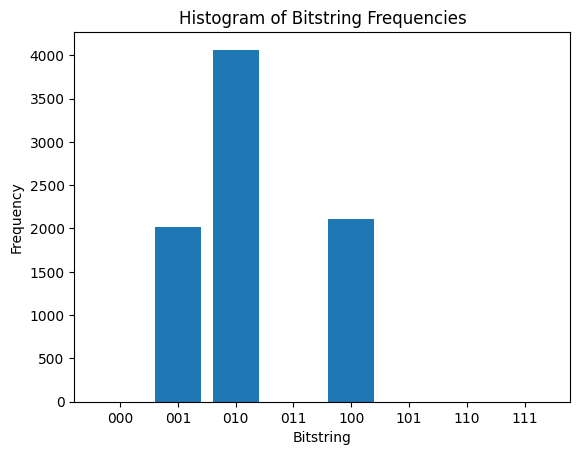

In [7]:
plt.bar(freqs.keys(), freqs.values())
plt.xlabel('Bitstring')
plt.ylabel('Frequency')
plt.title('Histogram of Bitstring Frequencies')
plt.show()